# 3章 ニューラルネットワーク

> 悪いニュースは，重みを設定する作業−期待する入力と出力を満たすような適切な重みを決める作業−は，今のところ人の手によって行われているということです． ... 適切な重みパラメータをデータから自動で学習できるというのがニューラルネットワークの重要な性質のひとつです．

この導入めっちゃわかりやすいな．ルールベースモデルから統計モデル（データから一部を学習させるモデル）を導入する感じ．

# 3.1. パーセプトロンからニューラルネットワークへ

> 図 3-1

入力層，中間層(隠れ層)，出力層，第 $i$ 層， $n$ 層ネットワーク，の定義がわかりやすい．  
「変換(線形変換，活性化)が何層に対して行われているか」で $n$ 層ネットワークを定義したい気持ちなんだと思う．

> 式 (3.1) を次の式 (3.2), (3.3) のように書き換えます

活性化関数へのこの持って行き方も，わかりやすい．

> 重み付きの入力信号(特徴量)の総和を計算し，その和を活性化関数によって変換する，という２段階の処理

結構これがすべて．図 3-4, 3-5 も厳密で分かりやすくて良いね．

> 「パーセプトロン」という言葉が指すアルゴリズムは，本書では厳密な統一がなされずに使われています．一般的に，...

こういう気になる部分の解説もあって良い．  また，2章の注釈に

> 本章で述べるパーセプトロンは正確には「単純パーセプトロン」と呼ばれるものです．ここでは単に「パーセプトロン」と呼ぶことにします

という前置きがあるので，それと合わせてこの辺を読むと，言葉の定義とか納得いく．  
まあ，単層でステップ関数のやつは「単純パーセプトロン」って厳密に呼んだ方が誤解なくて良さそう．

まあ，厳密な決まりはなさそうだし，気にしすぎない．

# 3.2. 活性化関数

> シグモイド関数

ロジスティックでお馴染みのやつ．

## 3.2.2. ステップ関数の実装

In [3]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [6]:
step_function(-1)

0

In [3]:
# ステップ関数の実装：行列表記した時のために np.array() 入力に対応させたい．

import numpy as np

In [26]:
x = np.array([-1.0, 1.0, 2.0])
x > 1

array([False, False,  True])

In [31]:
# np.array([False, False, True]).astype(int)
np.array([False, False, True]).astype(np.int)

# この技は知らなかった．便利．

array([0, 0, 1])

In [28]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [30]:
step_function(np.array([2, 1, -2]))

array([1, 1, 0])

## 3.2.3. ステップ関数のグラフ

In [32]:
import matplotlib.pyplot as plt

In [42]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

(-0.1, 1.1)

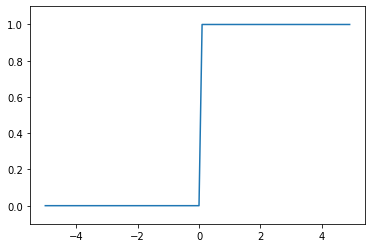

In [43]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
# plt.show()

## 3.2.4. シグモイド関数の実装

In [50]:
# np.exp(0)
np.exp(np.array([0, 1, 2]))
# -np.array([1,2,3])

array([1.        , 2.71828183, 7.3890561 ])

In [66]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [53]:
sigmoid(np.array([-2.0, -1.0, 0.0, 1.0, 2.0]))

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

In [55]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
# y

(-0.1, 1.1)

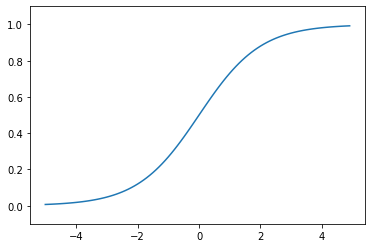

In [56]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

## 3.2.5.  シグモイド関数とステップ関数の比較

### 相違点

- 滑らかさ＝微分可能かどうか．学習(パラメータ推定, 勾配を使った最適化)において重要
- 出力が連続値か離散二値か．

### 共通点

- 非線型関数である
- 入力の単調増加関数
- 出力のとりうる値が 0 から 1 までの間に収まっている．

## 3.2.6. 非線型関数

後で出てくる行列表記を理解すれば分かりやすいが，活性化関数に線形関数を使うと，何層重ねようと結局
$\boldsymbol{y} = \boldsymbol{A} \boldsymbol{x}$
の形にまとめられてしまう．     

これだと，層を重ねている意味が無いというか，層を重ねても表現力(モデルの柔軟性，関数のグニャグニャ度)を上げることができない，ということ．まあ納得．

本文の説明も雰囲気わかりやすい．

## 3.2.7. ReLU 関数

In [62]:
np.maximum(np.array([-1, 1, -0.5, 2]), 0)
# この関数は知らなかった．便利．まあ R でも同じことできそうだな． max(c(1,2,3), 1) みたいな．

array([0., 1., 0., 2.])

In [63]:
def relu(x):
    return np.maximum(x, 0)

In [64]:
relu(np.array([-1, 4, -5, 2]))

array([0, 4, 0, 2])

In [66]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
# y

(-0.1, 5)

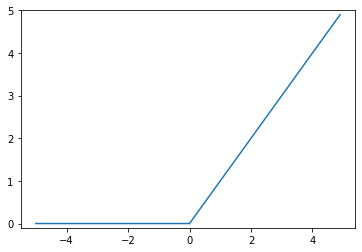

In [68]:
plt.plot(x, y)
plt.ylim(-0.1, 5)

なんで最近は ReLU が好まれるか，とかは，深層学習理論の研究してる人たちが考えてくれているんだろう．  
どこまで複雑な関数を表現できるかの表現力とか，汎化誤差の観点から．

# 3.3. 多次元配列(行列)の計算

In [2]:
import numpy as np

In [11]:
a = np.array([1, 2, 3, 4])
a.shape    # 配列の形状(数学的には行列ベクトルの次元？)
a.ndim      # 配列の次元数(1次元配列＝ベクトル，2次元配列＝行列，３以上次元配列＝テンソル)

1

In [17]:
B = np.array([[1,2], [3,4], [5,6]])    # ３行２列の行列
B
B.ndim
B.shape

(3, 2)

In [23]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6,], [7,8]])
A
B
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [34]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
A.shape
B.shape
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [48]:
A = np.array([[1,2], [3,4], [5,6]])  # 3 x 2
b = np.array([7,8])
np.dot(A, b)
# 1次元配列(ベクトル)は縦ベクトル(今回は 2 x 1)とみなされるのか？

# np.dot(b, A)
# これはエラー．なので，np.dot() ではちゃんと順序の区別がついていて，　第１引数 x 第２引数，の行列積が計算される．

array([23, 53, 83])

## 3.3.3. ニューラルネットワークの行列の積

> 図 3-14 の $ x W = y$

主成分とかだと $W x$ の順だったから逆で違和感だが，ネットワークの図と見比べることを考えると，こういう風に右から重み係数行列を掛けて行った方がわかりやすいな．  
「入力層の変数 $\times$ 中間層1の係数行列 $\times$ 中間層2の係数行列 $\times \cdots \times = $ 出力層の変数」  
という感じでネットワーク図と並べてわかりやすく表記できる．

この表記だと， 入力ベクトル $x$ と出力ベクトル $y$ は横ベクトルだよ．注意．  
$m \times n$ 重み係数行列は(右から掛けることで)「特徴量を $m$ 次元から $n$ 次元に線形変換する」という意味の役割になって，これはこれでわかりやすい．

てか，この $x W$ っていう形にしておくと，のちのバッチ処理(3.6.3) で行ベクトル $x$ を束ねて(バッチにして) 計画行列 $X$ を作り，  
行列表現 $X W$ を得ることができる． これは線形回帰モデル $y = X \beta$ の直接の拡張としてみなせる．  
この $\beta$ は $p \times1$ 行列で， $p$ 変数を線形変換して 1 次元にする，と解釈できるから．

In [59]:
x = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
# W
y = np.dot(x, W)
y
# 1 次元配列は↑では縦ベクトルとして扱われたが，ここでは横ベクトルとして扱われている．
# したがって， 1次元 numpy 配列には縦横の区別は無くて， 毎回の np.dot() において積が定義されるように解釈される．

array([ 5, 11, 17])

In [58]:
# 勝手に縦横の解釈がされないような列ベクトルあるいは行ベクトルを作りたければ， 1 x p  あるいは p x 1 の2次元配列にしちゃえば良い．
col_vec = np.array([[1], [2]])
row_vec = np.array([[1, 2]])
col_vec.shape
row_vec.shape

(1, 2)

# 3.4. ３層ニューラルネットワークの実装

> $w_{ij}^{(l)}$, $a_k^{(l)}$ などのノーテーション．図 3-16 とか 式 (3.8), (3.9) とか．

肩の $(l)$ は自然で良いと思う． 第 $l$ 層にいる線形結合を $a^{(l)}$ で表し，第 $l$ 層への重み係数を $w^{(l)}$ で表す．  
「線形変換とその結果得られたベクトルのセット」を１つの層と見做しているイメージにも合致する．  

ただ， 重み係数 $w_{ij}$ のノーテーションはちょっと微妙．  
その結果 (3.9) の行列 $W$ において $w_{ij}$ が $j,i$ 成分になっちゃってる．

同値 (行列 $W$ の値は変わらない) だし，自分の中では，  
$w_{ij}$ は前層の第 $i$ ニューロンから次層の第 $j$ ニューロンへの重み，と思って，$W = \{w_{ij}\}$ と思っておこう．  
つまり，自分の中での $w_{ij}$ は本書での $w_{ji}$ を指す．

In [64]:
x = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

a1 = np.dot(x, W1) + b1
a1

array([0.3, 0.7, 1.1])

In [69]:
z1 = sigmoid(a1)  # 前に定義した各要素をシグモイドで変換する関数
z1

array([0.57444252, 0.66818777, 0.75026011])

In [71]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])
a2 = np.dot(z1, W2) + b2
z2 = sigmoid(a2)
z2

array([0.62624937, 0.7710107 ])

In [74]:
def identity_function(x):
    return x

In [77]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])
a3 = np.dot(z2, W3) + b3
y = identity_function(a3)
y

array([0.31682708, 0.69627909])

> 図 3-20 の表記では，出力層の活性化関数は $\sigma()$ で表し，隠れ層の活性化関数 $h()$ とは異なることを示しています．  

> 回帰問題では恒等関数，２クラス分類問題ではシグモイド関数（で出力層のノードは１個？），多クラス分類問題ではソフトマックス関数（で出力層のノードはK個？）を使うのが一般的です．

分類でシグモイド関数とソフトマックス関数を使うのは，ニューラルネットワーク全体で識別モデル(not識別関数)を作りたいからだろう．  
つまり解釈や意思決定(ex.棄却オプション)のために出力を「確率」で得たいからだろう．  
ただ，回帰で恒等関数が好まれるっていうのは，理由あんまわからん．最後は非線形変換しても無駄っていうことかな．  
まあ詳しくは次節らしい．それか MLP 本とか見る．

In [87]:
class Network:
    
    def __init__(self, W1, W2, W3, b1, b2, b3, activate, activate_f):
        self.W1 = W1
        self.W2 = W2
        self.W3 = W3
        self.b1 = b1
        self.b2 = b2
        self.b3 = b3
        self.activate_func = activate
        self.activate_final = activate_f
    
    def forward(self, x):
        a1 = np.dot(x, self.W1) + self.b1
        z1 = self.activate_func(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = self.activate_func(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        y = self.activate_final(a3)
        return y

In [93]:
network = Network(
    W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]), 
    b1 = np.array([0.1, 0.2, 0.3]), 
    W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]), 
    b2 = np.array([0.1, 0.2]), 
    W3 = np.array([[0.1, 0.3], [0.2, 0.4]]), 
    b3 = np.array([0.1, 0.2]), 
    activate = sigmoid, 
    activate_f = identity_function
)

In [94]:
network
dir(network)
network.W1
# network.activate_func

array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]])

In [95]:
network.forward(x = np.array([1.0, 0.5]))

array([0.31682708, 0.69627909])

> forward という単語が出てきましたが，これは入力から出力方向への伝達処理を表しています．後ほど，ニューラルネットワークの学習を行う際に， backward 方向−出力から入力方向−の処理について見ていく

forward のニュアンスは納得できる．新たなデータについて予測する時は forward だろうな．

# 3.5. 出力層の設計

> ソフトマックスの出力は，すべての入力信号から矢印による結びつきがあります．出力の各ニューロンが，すべての入力信号から影響を受けることになるからです．

確かにそうだが， $a_k$ を標準化(的なこと)して $y_k$ に変換しているだけなので，
中間層までの線形変換と同じ描き方(全て実線の矢印) をするのは微妙．

ソフトマックスの時は出力層を図 3-20 みたいに描けないな，まあしょうがない．

識別モデル(not識別関数)を作るために「足して１になる割合化」したいだけなら，$y_k = \frac{a_k}{\sum_i a_i} $ でも良いのだが．勾配降下で微分のこと考えだすとソフトマックス関数にアドが出てくると思う．  
あと，マイナスの入力に対応できる点も，ソフトマックスのアド．もし $y_k = \frac{a_k}{\sum_i a_i} $　だとマイナスの値の時に負の値が出てきて確率にならない．

In [99]:
a = np.array([1, 2, 3])
np.exp(a)
sum(np.exp(a))
np.exp(a) / sum(np.exp(a))

array([0.09003057, 0.24472847, 0.66524096])

In [100]:
def softmax(a):
    return np.exp(a) / sum(np.exp(a))

In [101]:
softmax(np.array([1,2,3]))

array([0.09003057, 0.24472847, 0.66524096])

## 3.5.2. ソフトマックス関数の実装上の注意

俺普段こういうのあまり考慮できていないから注意．

In [5]:
np.exp(100)
np.exp(1000)
# np.exp(-100)
# np.exp(-1000)

# 確かに指数関数だと割と簡単に無限大 inf とかになる．まあそりゃそうかオーダー的に．

/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

> オーバーフロー

数値は有限個のビットで記録されるから，表現できる数値の範囲には制限があるよ (基本情報でやった)．  
なので，計算結果で表現不可能なほど大きい(小さい)値が出てきちゃって，  
それが(メモリ上のある区域に)記録されようとすると「それは無理です」となる．  
それがオーバーフロー．

> (3.11)で述べていることは，ソフトマックス関数の指数関数の計算を行う際には，何らかの定数を足し算（もしくは引き算）しても結果は変わらない，ということです．

> オーバーフローの対策としては，入力信号の中で最大の値を用いる(入力信号ー最大値の引き算をする)のが一般的です．

これ賢い．↓の実際の確認もわかりやすい．

In [22]:
a = np.array([1010, 1000, 990])
# 入力値に差があるわけだし，ソフトマックス関数に入れた結果にも差がちゃんと現れて欲しい．

np.exp(a) / np.sum(np.exp(a))
# しかし，正確に計算できずすべて nan になってしまう．

# np.exp(a), np.sum(np.exp(a))
# なぜなら，　np.exp(a) の段階で inf になっちゃって，  inf / inf  の不定形みたいな感じになるから．

# warning メッセージ(警告文)にも， overflow してるよ，というメッセージあり．

/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [24]:
c = np.max(a)
np.exp(a - c) / np.sum(np.exp(a - c))
# オーバーフローをちゃんと押さえて値を正しく算出でき，もとの入力(1010, 1000, 990)の差がちゃんと現れた．

# np.exp(a - c), np.sum(np.exp(a - c))
# 最大値を引いて全体を小さめにすることで，exp()でのオーバーフローを防げている．

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [29]:
def softmax(a):
    c = np.max(a)               # オーバーフロー対策
    return np.exp(a - c) / np.sum(np.exp(a - c))

In [30]:
softmax(np.array([1010, 1000, 990]))
softmax(np.array([10100, 10000, 9900]))

array([1.00000000e+00, 3.72007598e-44, 1.38389653e-87])

In [72]:
# シグモイド関数(ロジスティック回帰)でもオーバーフローは気にしないといけない．

# np.exp(100)/(1 + np.exp(100))           # これはちゃんと確率１になるが，
# np.exp(1000)/(1 + np.exp(1000))
# これはオーバーフローで nan になってしまう．明らかに確率１と出て欲しいのに

1/(1+np.exp(-100))                             
1/(1+np.exp(-1000))
1/(1+np.exp(-(-1000)))
# 分母分子を exp(x)　で割ったこの形を使えば，　オーバーフローは起きても inf /　inf にならず 1/inf になるからセーフ．

/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


0.0

## 3.5.3. ソフトマックス関数の特徴

さっきから何回もメモで書いたが，

> ソフトマックス関数を用いることで，問題に対して確率的（統計的）な対応ができるようになる

っていうのが識別モデルの大きなメリット． PRML でやった決定理論を色々使える．棄却オプションとか．

あとはまあ，確率を予測するようにすれば，ベルヌーイ試行を仮定することで尤度を作れて，自然に最尤法でパラメータ推定できる．

> ソフトマックス関数を適用しても各要素の大小関係は変わらない．ただ分類を行いたいだけで確率は要らないときは，出力層のソフトマックス関数を省略して，それなりのコストがかかる指数関数の計算を避ける．

確かに，これは重要．ビッグデータになるほどこの辺の差が顕著に出てきそう．

> 機械学習は「学習」と「推論」の２つのフェーズに分けられ，前者がデータからのモデル構築，後者が新たなデータに対する予測

この「推論 (inference)」という用語，けっこう一般的らしい．覚えとこう．  
俺はこれまであんま触れなかったけど「新たなデータに対する予測＝推論」という感じ． （selective inference, causal inference の inference とかとダブって若干気持ち悪いがしょうがない）

## 3.5.4. 出力層のニューロンの数

> (多クラス)分類タスクの時は，出力層にはクラスの個数分のニューロンを設定する

多クラス分類のとき，多項ロジスティックだと K-1 個のモデルを作ってって感じで若干分かりづらいが，ニューラルネットだと自然な感じで良いな．

# 3.6. 手書き数字認識

> 推論処理は，ニューラルネットワークの順方向伝搬（forward propagation）とも言います

これまでの用語の定義からして，それはそうだな

> MNISTデータセット（手書き数字の画像データセット）

機械学習(ニューラルネット), 画像認識における iris 的な存在．  
集中講義でもやったので，あの時と結果とかコードを比べてみても面白いかも．  

> 各ピクセルは 0 から 255 までの値をとります

1バイト(8ビット)の2進数で表せるのは 2^8 = 256 通り．なので，1バイトではピクセルの輝度値を 0 から 255 までで表せる．

> 本書では MNIST データセットのダウンロード・前処理用スクリプト `mnist.py` を GitHub で提供

公式リポジトリ clone して，そこから dataset ディレクトリ (モジュール群) をコピーしてこっちに持ってきた．

In [2]:
import sys
import os

print(sys.path)
# モジュールをインポートする際に見に行く場所のパス群
# デフォルトだと conda とかでちゃんと install したサードパーティーライブラリが入ってるところとカレントにしかパスが通ってない．
print(type(sys.path))
# リスト型．
print(os.pardir)
# カレント(このipynbが入っている)ディレクトリの親ディレクトリへの相対パス．つまり一個上の階層への相対パス． parent directory.

sys.path.append(os.pardir)  # カレントの親ディレクトリにも import のパスを通す（import の際に見に行かれるようにする）
print(sys.path)

from dataset.mnist import load_mnist

['/Users/rui/research/zero_DL/chapter_3', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python37.zip', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/lib-dynload', '', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/aeosa', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/IPython/extensions', '/Users/rui/.ipython']
<class 'list'>
..
['/Users/rui/research/zero_DL/chapter_3', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python37.zip', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/lib-dynload', '', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/aeosa', '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/pyth

`load_mnist()`　の仕様は，ソースの docstring を参照．↓

```python
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み
    
    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか
    
    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
```

In [48]:
load_mnist(flatten=True, normalize=False)
# 初回の実行でダウンロードして .pkl　生成がされるらしいので，最初にただ実行してみた．

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


((array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 (array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [9]:
print("x_train : ")
print(x_train)
print(type(x_train), x_train.ndim, x_train.shape, "\n")

print("t_train : ")
print(t_train)
print(type(t_train), t_train.ndim, t_train.shape, "\n")

print("x_test : ")
print(x_test)
print(type(x_test), x_test.ndim, x_test.shape, "\n")

print("t_test")
print(t_test)
print(type(t_test), t_test.ndim, t_test.shape)

# 28 x 28 = 784 ピクセルの輝度値を行列じゃなく潰してベクトルとして扱うので， 784 次元変数ベクトルみたいになってる．

x_train : 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'> 2 (60000, 784) 

t_train : 
[5 0 4 ... 5 6 8]
<class 'numpy.ndarray'> 1 (60000,) 

x_test : 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'> 2 (10000, 784) 

t_test
[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'> 1 (10000,)


In [28]:
print(np.array([1,2,3,4,5,6]).reshape(2, 3))

[[1 2 3]
 [4 5 6]]


In [29]:
img = x_train[0, :]
print(img.shape)

img = img.reshape(28, 28)
print(img.shape)

(784,)
(28, 28)


In [10]:
from PIL import Image
print(Image)
print(type(Image))

<module 'PIL.Image' from '/Users/rui/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/PIL/Image.py'>
<class 'module'>


In [22]:
print(x_train.dtype)
# 8ビットの符号なし整数型．MNIST では輝度値が 0〜255 (8ビット=1バイト分)　で表されてるので， load_mnist時に uint8 を使ったんだと思う．

np.uint8([1,2,3,4])
# 全部数値が入ってるリストを dtype=uint8 の ndarray にキャストできてるぽい．

uint8


array([1, 2, 3, 4], dtype=uint8)

In [24]:
def show_img(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [35]:
idx = 2
img = x_train[idx, :].reshape(28, 28)
label = t_train[idx]

show_img(img)
print(label)

4


## 3.6.2. ニューラルネットワークの推論処理

> １つ目の隠れ層が50個, ２つ目の隠れ層が100個のニューロンを持ち，この個数は任意に設定できます

ハイパーパラメータの塊．

In [65]:
class NN_given:
    def __init__(self, W1, b1, W2, b2, W3, b3, activate, activate_out):
        self.W1, self.b1, self.W2, self.b2, self.W3, self.b3 = W1, b1, W2, b2, W3, b3
        self.activate, self.activate_out = activate, activate_out
    def predict(self, x):
        a1 = np.dot(x, self.W1) + self.b1    # 784 → 50
        z1 = self.activate(a1)
        a2 = np.dot(z1, self.W2) + self.b2  # 50 → 100
        z2 = self.activate(a2)
        a3 = np.dot(z2, self.W3) + self.b3  # 100 → 10
        y = self.activate_out(a3)
        return y

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    c = np.max(x)     # オーバーフロー対策
    return np.exp(x - c)/np.sum(np.exp(x - c))

In [66]:
import pandas as pd
given_weight = pd.read_pickle("sample_weight.pkl")             # pandas で DataFrame形式だけじゃなくディクショナリ形式の pickle も読める．

# import pickle
# with open("sample_weight.pkl", "rb") as f:           # rb は read binary
#     given_weight = pickle.load(f)

print(given_weight)
print(type(given_weight), given_weight.keys())

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

In [67]:
nn_mnist = NN_given(
    W1=given_weight["W1"], b1=given_weight["b1"],
    W2=given_weight["W2"], b2=given_weight["b2"],
    W3=given_weight["W3"], b3=given_weight["b3"],
    activate=sigmoid, activate_out=softmax
)

In [94]:
# 与えられたモデル(重み)は， normalize したデータから学習したものらしい． なので当然，テストデータも normalize させる．
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

In [95]:
idx=5
prob = nn_mnist.predict(x=x_test[idx, :])
print(prob, np.sum(prob))
print(np.argmax(prob))
print(t_test[idx])

[3.0314158e-08 9.8850071e-01 1.7312473e-03 2.2392001e-03 8.4456326e-05
 2.9864057e-04 3.4739434e-05 4.7724475e-03 1.9128988e-03 4.2562996e-04] 1.0
1
1


In [96]:
cnt = 0
for i in range(x_test.shape[0]):   # len(x_test)
    prob  = nn_mnist.predict(x=x_test[i, :])   # x_test[i]
    if np.argmax(prob) == t_test[i]:
        cnt += 1

In [97]:
# print("Accuracy : " + str(float(cnt/x_test.shape[0])))
print("Accuracy : " + str(cnt/x_test.shape[0]))

Accuracy : 0.9352


> 画像の各ピクセルの値 (つまり説明変数, 生の特徴量) を 255 (全体の最大値) で除算し，データの値が 0.0 〜 1.0 の範囲に収まるよう変換．

> このようなデータをある決まった範囲に変換する処理を正規化 (normalization) と言います．

> ... 255 で割るだけの単純な正規化を行いました． ... 広がりをある範囲に収めたりといった正規化を行います．

まず，ここでの「正規化」は統計での正規化 (平均 0 , 標準偏差 1 に変換) を含んだより広い概念だな．  

統計の正規化 (各ピクセル内で平均 0 ,標準偏差 1 に変換) をして，全ての説明変数の 1 の価値を揃えたら，精度上がる感じはする．  
しかし，この例では全部のピクセル(変数)に対して全く同じ処理をしてて，それだと精度が上がる気がしない．どうなんだろ．  
学習効率に関係してくるのか？

> データ全体の分布の形状を均一にするといった方法−これを**白色化** (whitening) と言います−などがあります．

これは「平均 0，分散を 1 にし，さらに各成分を互いに無相関する」という前処理．[参考](https://mathwords.net/musoukanka#i-3)  
$p$ 次元変数に対して主成分分析を行って $p$ 個全ての主成分を作れば，白色化は達成できそう．調べたら確かに関係あった．[参考](https://wonderfuru.com/%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E7%99%BD%E8%89%B2%E5%8C%96-2-2/)

## 3.6.3. バッチ処理

小西本ので線形回帰の話を思い出して．  
とりあえず線形結合として線形回帰モデルを定義し，そのあと，  
複数の観測値ベクトルについてのモデルを行列表記で $X \beta + \varepsilon$ と表せるね，という話だった．  
これは見方変えると，複数の観測値ベクトルに対して予測値を $X \beta$ で一気に計算できるよね，ということ．  
この $\beta$ は $p \times 1$ 行列で，(右からかけることで) $p$ 次元観測値ベクトル $x$ を $1$ 次元アウトカムに線形変換している．

これをそのまま拡張したのが，ニューラルネット（の線形変換,アフィン変換)．
1. $m$次元を $n$次元に変換するモデル $x W$ を考える．
2. 複数の入力ベクトルについて，このモデルは $X W$ と表せる．

この事実を利用して，入力ベクトルの塊 (**バッチ**) に対して行列計算で一気にアウトカム予測値を算出することを，**バッチ処理**と言う．

In [141]:
X = x_test
print(X.shape)                        # 入力ベクトルを束ねたバッチ　（　x を rbind した計画行列 X　）
print(nn_mnist.W1.shape)   # 784 → 50次元に線形変換する 784 × 50 行列 W1
print(nn_mnist.b1.shape)    # バッチ処理したかったら bi を (bi, bi, ..., bi)^T に変換しないとサイズ的に足し合わせできないと思う． ↓しなくても大丈夫だった↓

(10000, 784)
(784, 50)
(50,)


In [135]:
# バイアス項のバッチ処理演算どうしよう．

print(np.array([[1,2,3], [4,5,6]]),   np.array([10, 100, 1000]))
print(np.array([[1,2,3], [4,5,6]]) + np.array([10, 100, 1000]))             # この規則，P14でブロードキャストの例として扱った．直感的ではないが便利．
# print(np.array([[1,2], [3,4], [5,6]],) ,  np.array([10, 100, 1000]))
# print(np.array([[1,2], [3,4], [5,6]],) + np.array([10, 100, 1000]))    # こちらはエラーなので，常に rbind な感じのブロードキャストがされるんだ．

# 行列 + ベクトル　におけるブロードキャストでは，　行列の各行ベクトルに対する加算が行われる．

# まあ，こういう便利なブロードキャストに頼るのはアリだが，数式と見比べた時との違和感が残る．
# 面倒くさがらず，ちゃんと　Bi = (bi, bi, ..., bi)^T を定義した方がわかりやすいと思う．

[[1 2 3]
 [4 5 6]] [  10  100 1000]
[[  11  102 1003]
 [  14  105 1006]]


In [136]:
print( [1, 2, 3] + [1, 2, 3]                      )
print( [1, 2, 3] * 5                                   )
print( [[1, 2, 3]] + [1, 2, 3]                   )
print( [[1, 2, 3]] + [[1, 2, 3]]                )
print( [[1, 2, 3]] * 5                                )   # これを応用すれば...
print( np.array([[1, 2, 3, 4, 5]] * 10)   )   # Bi = (bi, bi, ..., bi)^T を作れるわ．

[1, 2, 3, 1, 2, 3]
[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
[[1, 2, 3], 1, 2, 3]
[[1, 2, 3], [1, 2, 3]]
[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]


In [139]:
# 活性化関数のバッチ処理演算はどうしよう...

print(  sigmoid(np.array([1, 2, 3]))                          )
print(  sigmoid(np.array([[1, 2, 3], [1, 2, 3]]))      )

# これも　行列 + ベクトル　のブロードキャストと同様に，行列の各行ベクトルに対して演算が行われる．

# このブロードキャストは，(バイアス項ベクトルの行列への加算と比べて)そんなに不自然さを感じないから，まあ，頼ってしまおう．

[0.73105858 0.88079708 0.95257413]
[[0.73105858 0.88079708 0.95257413]
 [0.73105858 0.88079708 0.95257413]]


In [180]:
# バッチ処理(バッチサイズ=n つまり一気に全部)で予測値算出(推論)　してみる．

print(x_test)
print(x_test.shape)

probs = nn_mnist.predict(x=x_test)  # 上記で確認したブロードキャスト機能によって，これで一気にバッチ処理できてしまう．
print(probs)
print(probs.shape)

preds = np.argmax(probs, axis=1)      # axis=1 と指定すると，列ごとの最大値 index が返される．
# preds = np.argmax(probs)                # axis を指定しないときは、多次元配列を flatten した（一次元配列に直した）状態での最大値 index を返す
# preds = np.argmax(probs, axis=0)  # axis=0 と指定すると，列ごとの最大値 index が返される．
print(preds)
print(preds.shape)

print( preds == t_test )

print( "Accuracy : " + str( sum(preds == t_test) / len(preds) ) )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)
[[2.6744647e-08 8.3487522e-10 2.2669194e-07 ... 3.1590319e-04
  2.9701399e-09 2.5926784e-07]
 [1.9413338e-07 4.4338709e-08 3.7902835e-05 ... 5.1012295e-11
  5.1637866e-08 1.9213229e-12]
 [3.5381028e-12 3.3780430e-05 1.4651680e-07 ... 7.7535880e-08
  4.2282110e-08 2.9619227e-09]
 ...
 [1.9153377e-11 2.7681264e-09 2.8718126e-09 ... 2.9553922e-08
  2.3387453e-07 8.6690522e-07]
 [9.2824095e-09 1.1410896e-08 1.8581964e-09 ... 5.6684113e-10
  1.2815890e-06 1.3370182e-09]
 [1.3560698e-07 6.3381383e-10 8.0339538e-07 ... 1.3755677e-10
  2.0161626e-09 1.1938017e-10]]
(10000, 10)
[7 2 1 ... 4 5 6]
(10000,)
[ True  True  True ...  True  True  True]
Accuracy : 0.9352


> バッチ処理によって，１枚(1予測)あたりの処理時間を大幅に短縮することができるよ．


python とかの for 文は最適化されてなくてその名の通り順番にループしていくけど，numpy とかの行列演算は最適化されているから．  
イメージ的には，for 文では「次のループの時に何が行われるかわからない」が，行列演算ではそれが分かってる．そこの差かなあ．

> また，ニューラルネットワークの計算において，データ転送がボトルネックになる場合は，バッチ処理を行うことで，バス帯域の負荷を軽減することができます（正確には，データの読み込みに対して演算の割合を多くすることができます）

これは意味ちょっと分からん．   for ループに対するアドを言ってるんじゃなくて，  
全体を一気に予測するんじゃなくていくつかのバッチに分けてそれぞれで予測する（つまりミニバッチ処理）の良さを言ってる？  
データ格納場所(ハードディスク, DB, クラウドなど)から予測対象データ全部を一気にメインメモリに持ってきてから予測するのではなく，  
１バッチ目をメモリに持ってくる．  
1バッチ目の予測値をバッチ処理で算出しながら，その間に2バッチ目をメモリに転送する．  
2バッチ目の予測値をバッチ処理で算出しながら，その間に3バッチ目をメモリに転送する．  
...   
って感じのことを言ってるのかも．確かにそうすると，バス(メモリとDB等の間のデータ通信経路)に一気に負荷がかからないようになる．

In [197]:
print(list(  range(0, 35, 10)           ))
print(list(  range(0, 31, 10)           ))
print(list(  range(0, 30, 10)           )) 
# range(start, end, step) は， start から 最大 end-1 までを step 刻みで返す． 初項 start で公差 step の等差数列を end-1 以下まで返す．

print(         np.arange(0, 35, 10)    )
# np,arange(a, b, c) は， range(a, b, c) の出力が np.ndarray になったバージョン．

[0, 10, 20, 30]
[0, 10, 20, 30]
[0, 10, 20]
[ 0 10 20 30]


In [188]:
print(x_test.shape)
print(x_test[9000 : 12000].shape)     # スライスで範囲外の index を指定しちゃっても， エラーを吐かず気を利かせてオーバーしたとこだけ無視してくれるのか．
print(x_test[11000 : 12000].shape)   # 存在しない index だけが指定されちゃってても， エラーを吐かず気を利かせて空を返してくれる．

(10000, 784)
(1000, 784)
(0, 784)


In [205]:
# (ミニ)バッチ処理で予測値算出(推論)

batch_size = 1300
cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i : (i + batch_size), :]
    print(i, i + batch_size)
    print(x_batch.shape)
    prob_batch = nn_mnist.predict(x=x_batch)
    pred_batch = np.argmax(prob_batch, axis=1)
    cnt += sum(pred_batch == t_test[i : (i + batch_size)])

print("Accuracy : " + str( cnt / len(x_test)))

0 1300
(1300, 784)
1300 2600
(1300, 784)
2600 3900
(1300, 784)
3900 5200
(1300, 784)
5200 6500
(1300, 784)
6500 7800
(1300, 784)
7800 9100
(1300, 784)
9100 10400
(900, 784)
Accuracy : 0.9352
